In [45]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [46]:
import pandas as pd

In [47]:
raw_data = pd.read_csv("raw_data_1000.csv")

In [48]:
len(list(raw_data.columns))

139

In [49]:
cols_to_select = [
    "listing.pricingInfo.rawPrice",
    "link.data.city",
    "link.data.state",
    "listing.usableAreas",
    "listing.totalAreas",
    "listing.parkingSpaces",
    "listing.suites",
    "listing.bathrooms",
    "listing.bedrooms",
    "listing.pricingInfo.yearlyIptu",
]

In [50]:
data = raw_data[cols_to_select]

In [51]:
cols = ["listing.totalAreas", "listing.usableAreas"]  # list of column names


def str_to_int(string):
    return string[2:-2]


for col in cols:
    data[col] = data[col].apply(lambda x: int(str_to_int(x)) if x != "[]" else None)

/tmp/ipykernel_93547/201648415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: int(str_to_int(x)) if x != "[]" else None)
/tmp/ipykernel_93547/201648415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: int(str_to_int(x)) if x != "[]" else None)


In [52]:
def str_to_int2(string):
    return string[1:-1]


cols = [
    "listing.parkingSpaces",
    "listing.suites",
    "listing.bathrooms",
    "listing.bedrooms",
]


for col in cols:
    data[col] = data[col].apply(
        lambda x: str_to_int2(x) if isinstance(x, str) else None
    )

/tmp/ipykernel_93547/2063256087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(
/tmp/ipykernel_93547/2063256087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(
/tmp/ipykernel_93547/2063256087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [53]:
data["listing.pricingInfo.yearlyIptu"] = data["listing.pricingInfo.yearlyIptu"].apply(
    lambda x: int(x[3:].replace(".", "")) if isinstance(x, str) else None
)

/tmp/ipykernel_93547/2854853742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["listing.pricingInfo.yearlyIptu"] = data["listing.pricingInfo.yearlyIptu"].apply(


In [54]:
# check for missing data
data.isna().sum()

listing.pricingInfo.rawPrice        0
link.data.city                      0
link.data.state                     0
listing.usableAreas                 0
listing.totalAreas                 63
listing.parkingSpaces               0
listing.suites                      0
listing.bathrooms                   0
listing.bedrooms                    0
listing.pricingInfo.yearlyIptu    513
dtype: int64

In [55]:
data.dtypes

listing.pricingInfo.rawPrice        int64
link.data.city                     object
link.data.state                    object
listing.usableAreas                 int64
listing.totalAreas                float64
listing.parkingSpaces              object
listing.suites                     object
listing.bathrooms                  object
listing.bedrooms                   object
listing.pricingInfo.yearlyIptu    float64
dtype: object

In [56]:
cols = [
    "listing.usableAreas",
    "listing.parkingSpaces",
    "listing.suites",
    "listing.bathrooms",
    "listing.bedrooms",
]
for col in cols:
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype(int)

/tmp/ipykernel_93547/1109782920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(0)
/tmp/ipykernel_93547/1109782920.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(int)
/tmp/ipykernel_93547/1109782920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

ValueError: invalid literal for int() with base 10: ''

In [ ]:
cols = [
    "listing.usableAreas",
    "listing.parkingSpaces",
    "listing.suites",
    "listing.bathrooms",
    "listing.bedrooms",
]
for col in cols:
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype(int)

/tmp/ipykernel_93547/1109782920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(0)
/tmp/ipykernel_93547/1109782920.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(int)
/tmp/ipykernel_93547/1109782920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

ValueError: invalid literal for int() with base 10: ''

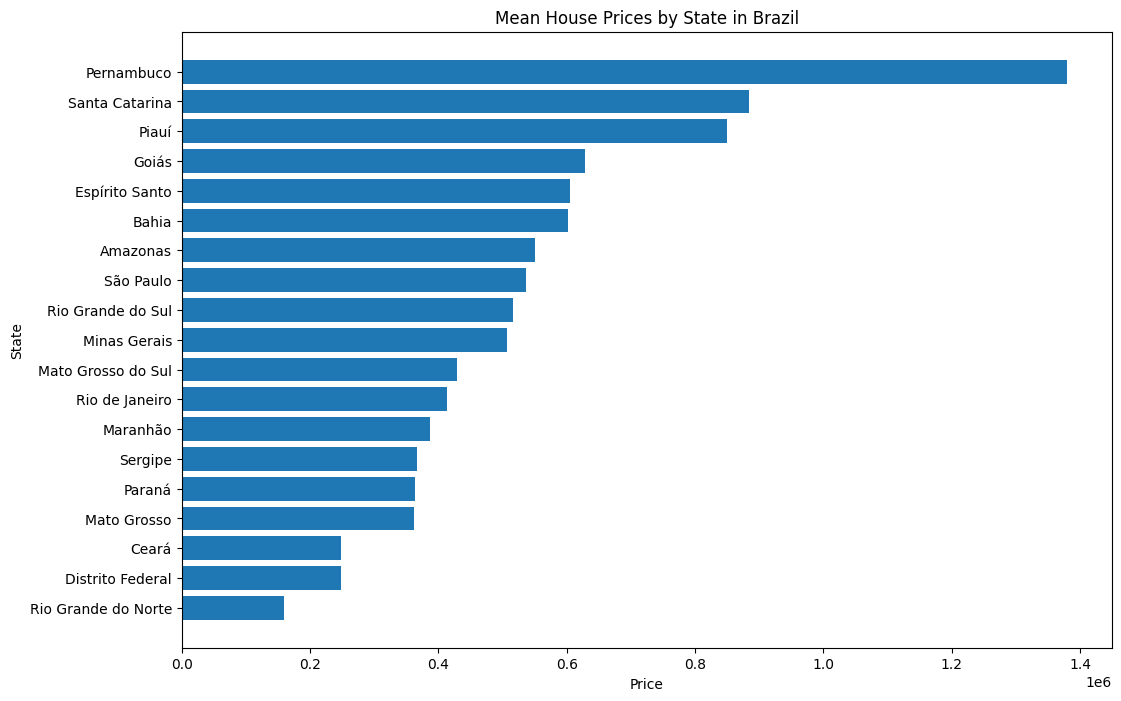

In [ ]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = (
    data.groupby("link.data.state")["listing.pricingInfo.rawPrice"].mean().reset_index()
)

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="listing.pricingInfo.rawPrice", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(
    sorted_grouped["link.data.state"], sorted_grouped["listing.pricingInfo.rawPrice"]
)
plt.xlabel("Price")
plt.ylabel("State")
plt.title("Mean House Prices by State in Brazil")
plt.show()

array([[<Axes: title={'center': 'listing.pricingInfo.rawPrice'}>,
        <Axes: title={'center': 'listing.usableAreas'}>],
       [<Axes: title={'center': 'listing.totalAreas'}>,
        <Axes: title={'center': 'listing.pricingInfo.yearlyIptu'}>]],
      dtype=object)

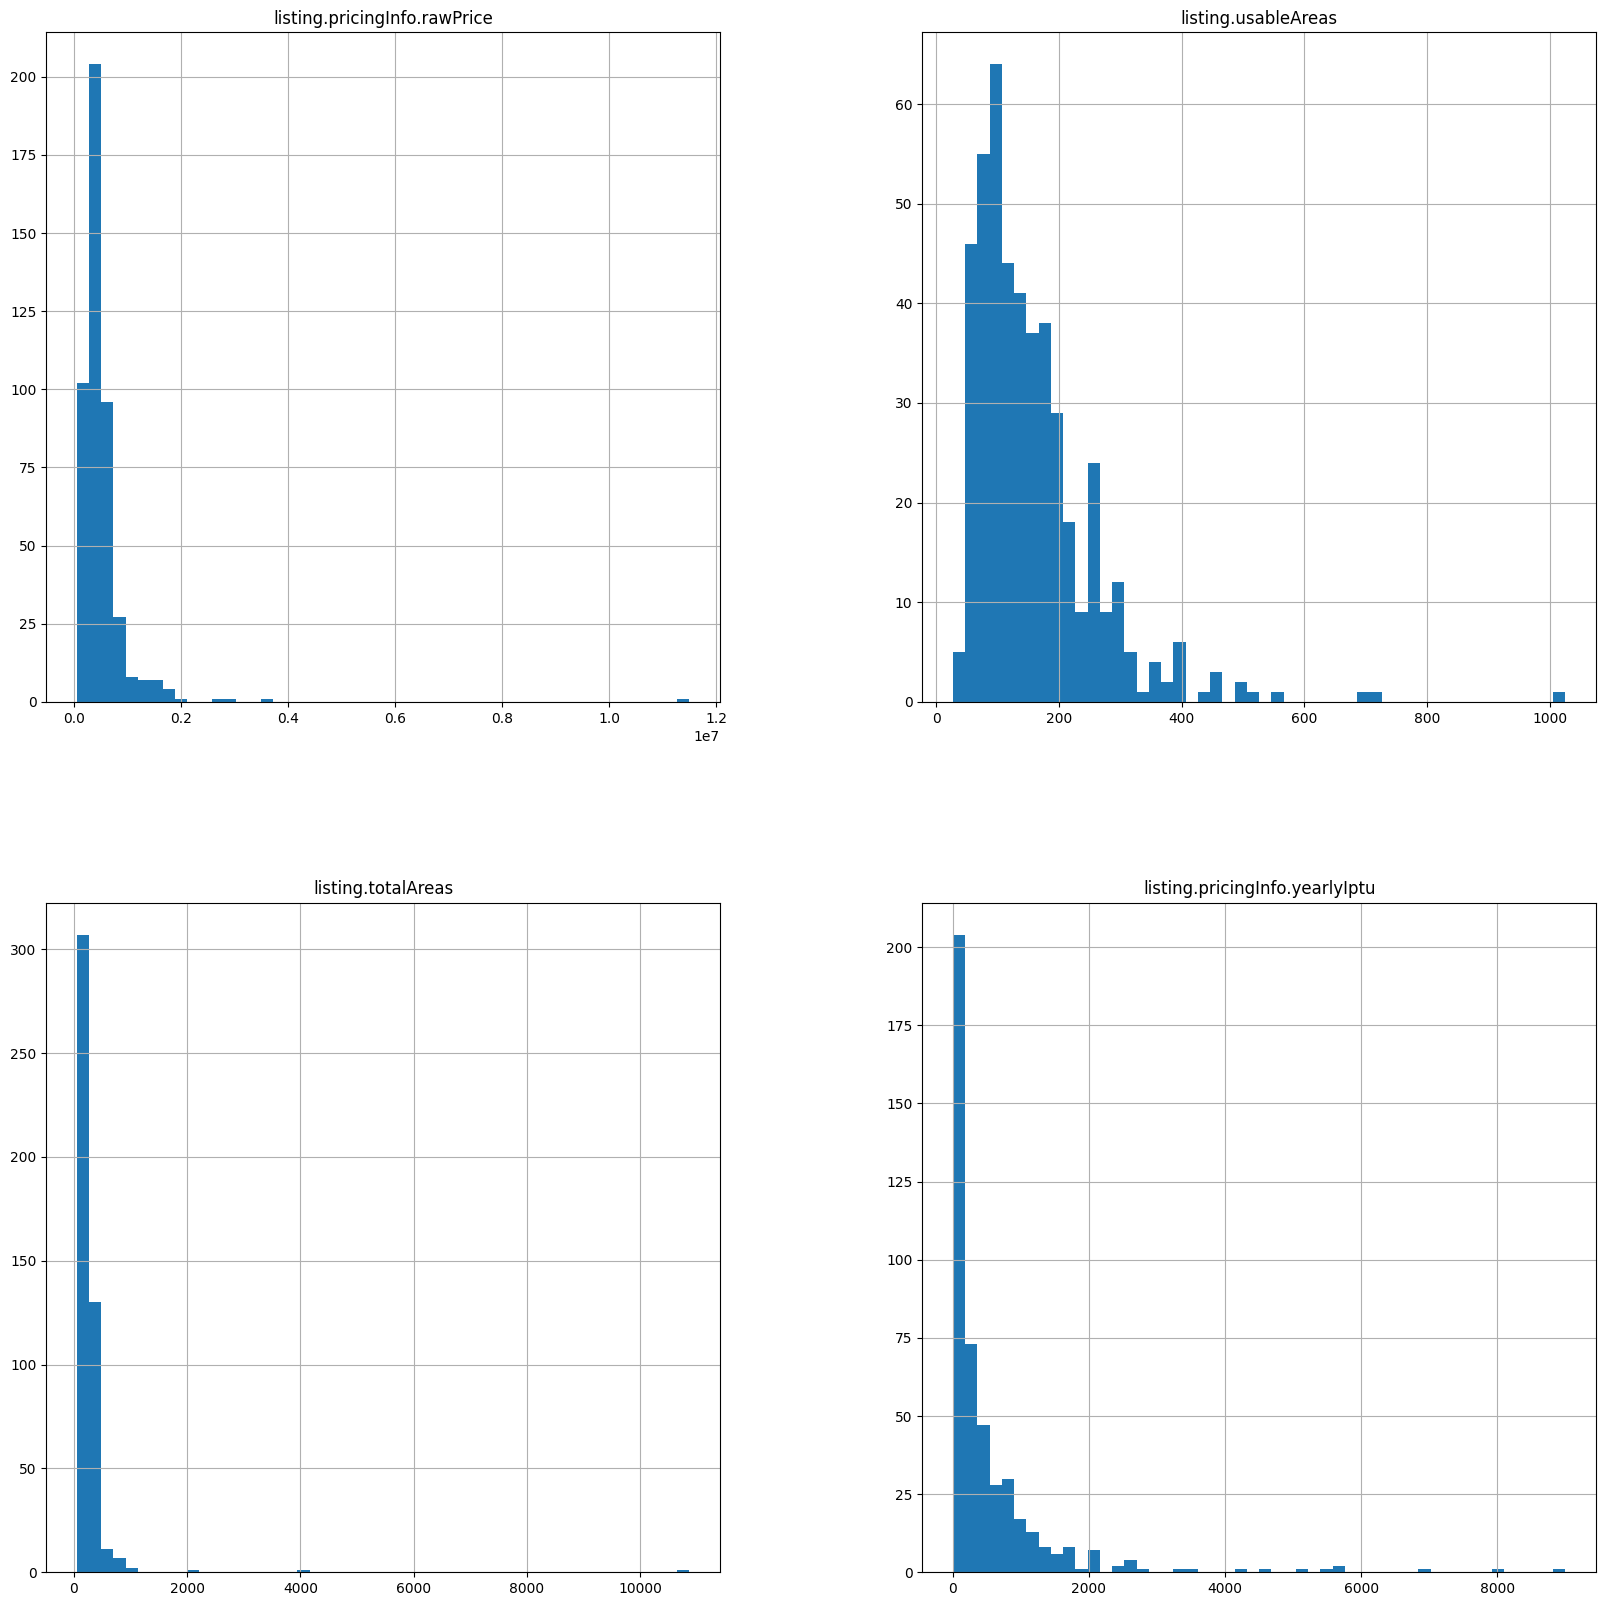

In [26]:
# Plot the distribution of all variables
data.hist(figsize=(20, 20), bins=50)


In [13]:
data.head()

,listing.pricingInfo.rawPrice,link.data.city,link.data.state,listing.usableAreas,listing.totalAreas,listing.parkingSpaces,listing.suites,listing.bathrooms,listing.bedrooms,listing.pricingInfo.yearlyIptu
0,1350000,Anápolis,Goiás,227,429.0,3,2,3,3,NaN
1,3000000,São Paulo,São Paulo,325,325.0,2,4,6,4,744.0
2,595000,Jaguariúna,São Paulo,97,97.0,2,1,2,3,100.0
3,395000,São José do Rio Preto,São Paulo,144,NaN,3,1,2,3,8000.0
4,320000,Anápolis,Goiás,104,150.0,2,1,1,3,1000.0


In [14]:
int_columns = [
    column
    for column in data.columns
    if column not in ["link.data.city", "link.data.state"]
]

In [15]:
import numpy as np

In [16]:
data = data.fillna(value=np.nan)
data = data.dropna()

In [17]:
# check for missing data
data.isna().sum()

listing.pricingInfo.rawPrice      0
link.data.city                    0
link.data.state                   0
listing.usableAreas               0
listing.totalAreas                0
listing.parkingSpaces             0
listing.suites                    0
listing.bathrooms                 0
listing.bedrooms                  0
listing.pricingInfo.yearlyIptu    0
dtype: int64

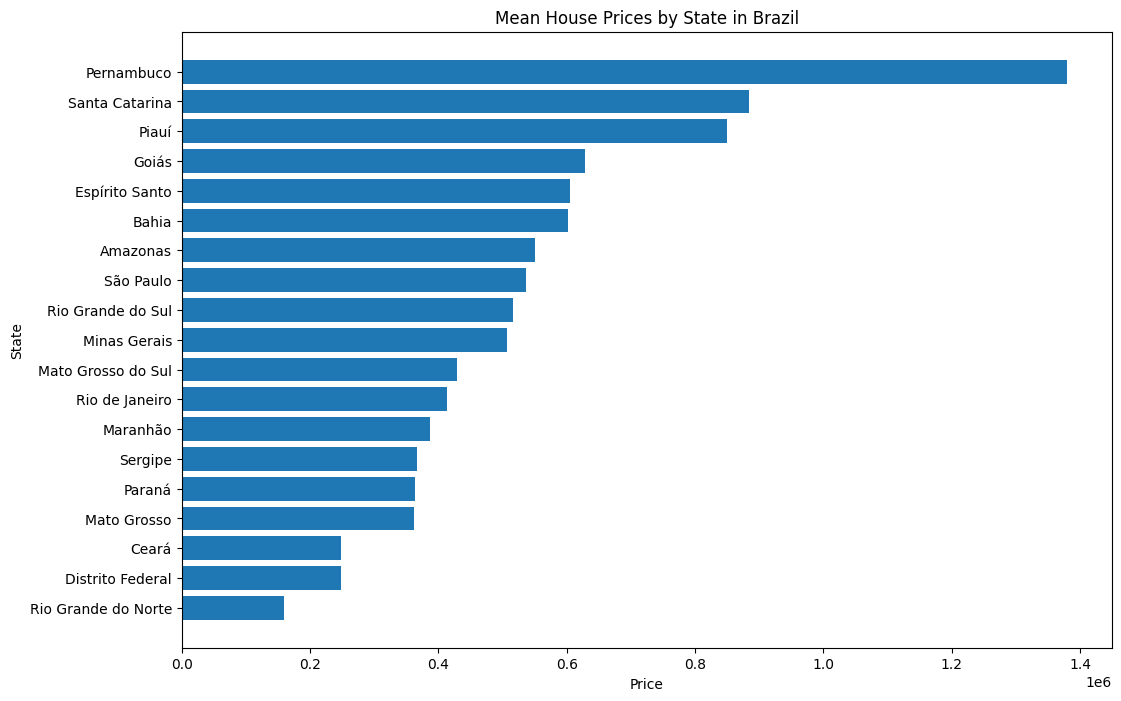

In [25]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = (
    data.groupby("link.data.state")["listing.pricingInfo.rawPrice"].mean().reset_index()
)

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="listing.pricingInfo.rawPrice", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(
    sorted_grouped["link.data.state"], sorted_grouped["listing.pricingInfo.rawPrice"]
)
plt.xlabel("Price")
plt.ylabel("State")
plt.title("Mean House Prices by State in Brazil")
plt.show()